In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("dielectron.csv")

# exploring the data
display(df)
df.info()
df.describe()


Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
0       2.14537 -2.344030 -2.072810  -1   8.94841  
1      12.75360  0.808077  2.734920   1  15.89300  
2       2.69667 -2.455080  2.148570   1  38.38770  
3       4.84272  2.330210  0.565865  -1   3.72862  
4       2.44145 -2.423700 -1.684810  -1   2.74718  
...         ...       ...       ...  ..       ...  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430  

[100000 rows x 19 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


Run         Event             E1           px1   \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean   147935.327230  4.957212e+08      36.436466       0.135897   
std       920.306064  4.037703e+08      41.216203      13.404976   
min    146511.000000  6.414000e+03       0.377928    -250.587000   
25%    147114.000000  2.023970e+08       8.458595      -5.233675   
50%    147929.000000  3.902759e+08      21.717000       0.141339   
75%    149011.000000  6.338891e+08      50.003350       5.714560   
max    149182.000000  1.791247e+09     850.602000     134.539000   

                 py1            pz1            pt1           eta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.182291      -1.508037      14.412167      -0.064095   
std        13.470281      51.603652      12.388740       1.462137   
min      -126.079000    -840.987000       0.219629      -4.165380   
25%        -5.276248     -15.859825       3.771172      -1.283883   
50%         0.099092      -0.312987      12.967800      -0.061178   
75%         5.648087      13.212650      20.018925       1.144408   
max       147.467000     760.096000     265.578000       2.622970   

                phi1            Q1             E2            px2  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean        0.021614      -0.00548      44.002901      -0.003984   
std         1.799562       0.99999      46.751132      13.127404   
min        -3.141580      -1.00000       0.472500    -233.730000   
25%        -1.527030      -1.00000      11.055725      -4.794770   
50%         0.034324      -1.00000      25.264600      -0.035638   
75%         1.562355       1.00000      66.925525       4.819540   
max         3.141420       1.00000     948.375000     227.330000   

                 py2            pz2            pt2           eta2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.124654      -1.590559      13.802036      -0.072830   
std        13.168867      61.430040      12.460549       1.738033   
min      -145.651000    -655.396000       0.026651      -7.064790   
25%        -4.605965     -22.036950       3.738103      -1.892287   
50%         0.083665      -0.690244      11.690950      -0.135911   
75%         5.061860      19.005825      19.596400       1.768253   
max       166.283000     935.558000     281.654000       3.060550   

                phi2             Q2             M  
count  100000.000000  100000.000000  99915.000000  
mean        0.021385      -0.004220     30.019521  
std         1.817031       0.999996     25.255847  
min        -3.141580      -1.000000      2.000080  
25%        -1.556925      -1.000000     12.445200  
50%         0.026986      -1.000000     21.283100  
75%         1.596737       1.000000     39.025050  
max         3.141290       1.000000    109.999000

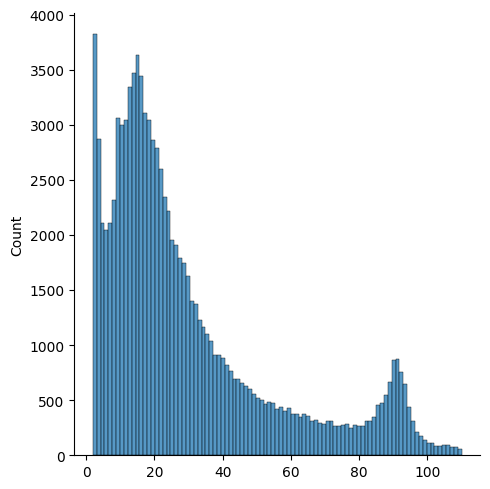

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("dielectron.csv")

# plotting the data
invariant_mass = df["M"].values
sns.displot(invariant_mass)

electron1 = df["E1"].values
electron2 = df["E2"].values

# sns.lineplot(electron1, electron2)
